In [1]:
'''
Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial 
for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature
selection methods including isolation forest and PPS score analysis.
Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
Tasks:
1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.
2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.
3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.
'''

'\nObjective:\nThis assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial \nfor building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature\nselection methods including isolation forest and PPS score analysis.\nDataset:\nGiven "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.\nTasks:\n1. Data Exploration and Preprocessing:\n•\tLoad the dataset and conduct basic data exploration (summary statistics, missing values, data types).\n•\tHandle missing values as per the best practices (imputation, removal, etc.).\n•\tApply scaling techniques to numerical features:\n•\tStandard Scaling\n•\tMin-Max Scaling\n•\tDiscuss the scenarios where each scaling technique is preferred and why.\n2. Encoding Techniques:\n•\tApply One-Hot Encoding to categorical variables with less than 5 categor

In [2]:
#Load the dataset and perform basic data exploration.
import pandas as pd
df = pd.read_csv("C:\\Users\\sujey\\Downloads\\Assignments\\EDA2\\EDA2\\adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
X = df.select_dtypes(include="number")
Y = df["income"]

In [8]:
#Standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(X)
SS_X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [9]:
#Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
MM_X = MM.fit_transform(X)
MM_X = pd.DataFrame(MM_X)
MM_X.columns = list(X)
MM_X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [10]:
#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Separate columns for one-hot and label encoding
one_hot_cols = []
label_cols = []

for col in categorical_cols:
    if df[col].nunique() <= 5:
        one_hot_cols.append(col)
    else:
        label_cols.append(col)

# Apply One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Apply Label Encoding
for col in label_cols:
    le = LabelEncoder()
    df_one_hot[col] = le.fit_transform(df_one_hot[col])

# Display the transformed dataframe
display(df_one_hot.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,40,39,False,False,False,True,True,False
1,50,6,83311,9,13,2,4,0,0,0,13,39,False,False,False,True,True,False
2,38,4,215646,11,9,0,6,1,0,0,40,39,False,False,False,True,True,False
3,53,4,234721,1,7,2,6,0,0,0,40,39,False,True,False,False,True,False
4,28,4,338409,9,13,2,10,5,0,0,40,5,False,True,False,False,False,False


In [11]:
df_one_hot['capital_diff'] = df_one_hot['capital_gain'] - df_one_hot['capital_loss']

# Create a new feature: income per hour (assuming 'income_ >50K' is the target)
# To avoid division by zero or very small numbers, add a small constant to hours_per_week
df_one_hot['income_per_hour'] = df_one_hot['income_ >50K'].astype(int) / (df_one_hot['hours_per_week'] + 1e-6)

display(df_one_hot.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,capital_diff,income_per_hour
0,39,7,77516,9,13,4,1,1,2174,0,40,39,False,False,False,True,True,False,2174,0.0
1,50,6,83311,9,13,2,4,0,0,0,13,39,False,False,False,True,True,False,0,0.0
2,38,4,215646,11,9,0,6,1,0,0,40,39,False,False,False,True,True,False,0,0.0
3,53,4,234721,1,7,2,6,0,0,0,40,39,False,True,False,False,True,False,0,0.0
4,28,4,338409,9,13,2,10,5,0,0,40,5,False,True,False,False,False,False,0,0.0


In [12]:
import numpy as np

# Apply log transformation to 'fnlwgt' as it is likely skewed
df_one_hot['fnlwgt_log'] = np.log1p(df_one_hot['fnlwgt'])

# Display the transformed dataframe with the new column
display(df_one_hot.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,capital_diff,income_per_hour,fnlwgt_log
0,39,7,77516,9,13,4,1,1,2174,0,...,39,False,False,False,True,True,False,2174,0.0,11.258253
1,50,6,83311,9,13,2,4,0,0,0,...,39,False,False,False,True,True,False,0,0.0,11.330348
2,38,4,215646,11,9,0,6,1,0,0,...,39,False,False,False,True,True,False,0,0.0,12.281398
3,53,4,234721,1,7,2,6,0,0,0,...,39,False,True,False,False,True,False,0,0.0,12.366157
4,28,4,338409,9,13,2,10,5,0,0,...,5,False,True,False,False,False,False,0,0.0,12.732013


In [13]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination='auto', random_state=100)

# Fit the model and predict outliers
# -1 indicates an outlier, 1 indicates an inlier
outliers = iso.fit_predict(df_one_hot)

# Create a new DataFrame without outliers
df_cleaned = df_one_hot[outliers == 1]

print(f"Original number of rows: {len(df_one_hot)}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")

display(df_cleaned.head())

Original number of rows: 32561
Number of rows after outlier removal: 28280


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,capital_diff,income_per_hour,fnlwgt_log
0,39,7,77516,9,13,4,1,1,2174,0,...,39,False,False,False,True,True,False,2174,0.0,11.258253
1,50,6,83311,9,13,2,4,0,0,0,...,39,False,False,False,True,True,False,0,0.0,11.330348
2,38,4,215646,11,9,0,6,1,0,0,...,39,False,False,False,True,True,False,0,0.0,12.281398
3,53,4,234721,1,7,2,6,0,0,0,...,39,False,True,False,False,True,False,0,0.0,12.366157
5,37,4,284582,12,14,2,4,5,0,0,...,39,False,False,False,True,False,False,0,0.0,12.558780


In [14]:
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Calculate the PPS matrix
pps_matrix = pps.matrix(df_cleaned)[['x', 'y', 'ppscore']]

# Display the PPS matrix
display(pps_matrix)

,x,y,ppscore
0,age,age,1.000000
1,age,workclass,0.000000
2,age,fnlwgt,0.000000
3,age,education,0.000000
4,age,education_num,0.000000
...,...,...,...
436,fnlwgt_log,sex_ Male,0.084344
437,fnlwgt_log,income_ >50K,0.000000
438,fnlwgt_log,capital_diff,0.000000
439,fnlwgt_log,income_per_hour,0.000000


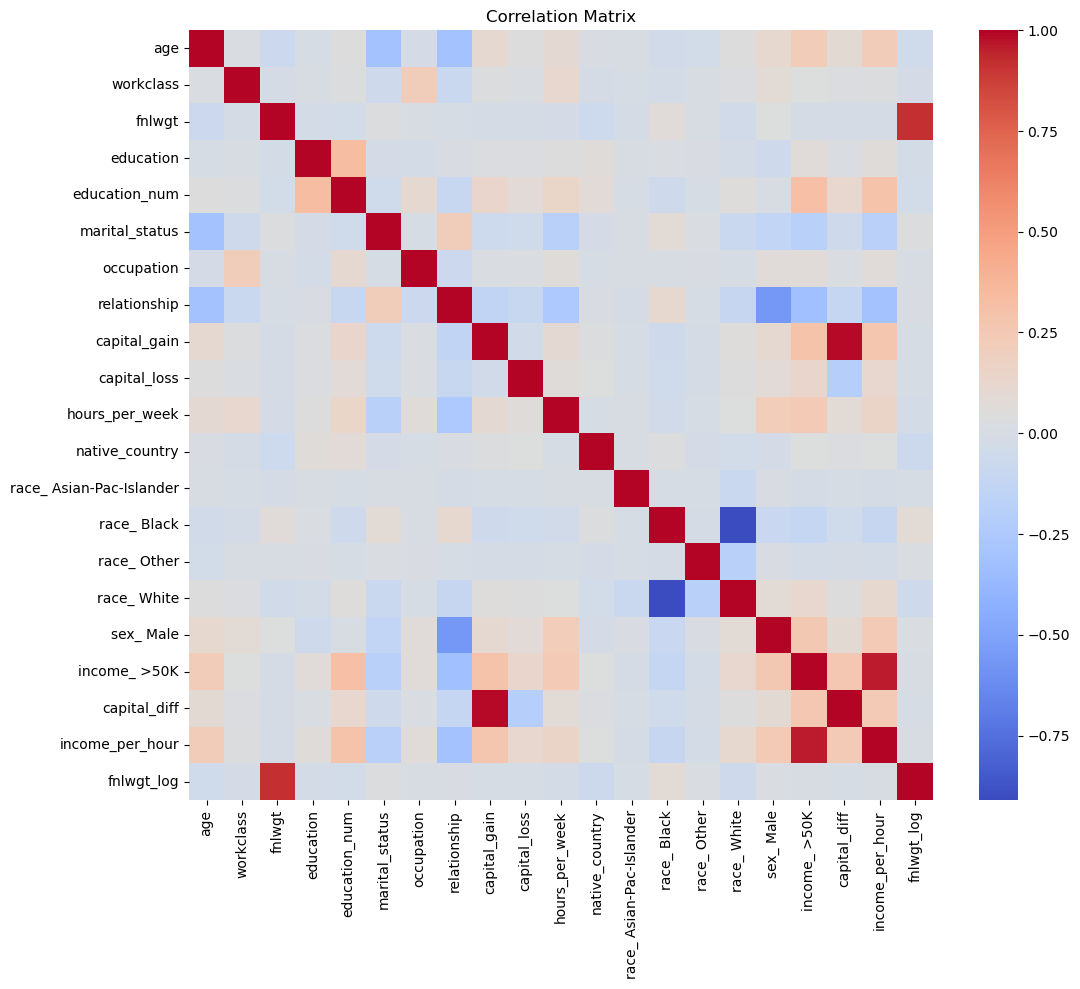

In [17]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # annot=False for readability with many features
plt.title('Correlation Matrix')
plt.show()